# Introduction

As the entertainment industry surges and major corporations dive into original video content, a new company is poised to enter the competitive world of movie-making. Recognizing the complexities of the film business, especially for newcomers, the company seeks to establish a strong foundation by understanding current box office trends and transforming these insights into a strategic roadmap for their new studio.

To ensure a successful start, the company has enlisted our help as Group 7 members to identify which types of films are currently performing well at the box office and translate these findings into actionable recommendations.

## Business Understanding

The Business objective is to identify which film genres will consistently bring in the most revenue for this new studio.  There are many elements that contribute to a film's success and our goal is to analyze these factors through Exploratory Data Analysis (EDA) and linear regression. This will allow us to uncover trends and connections that will guide the studio's production choices. 

Ultimately, we want to translate these insights into actionable recommendations that will help the studio create films that captivate audiences and turn a profit.

## Objectives

1.To determine which types of films are performing best at the box office.

2.To identify key factors that contribute to a film's success.

## Specific Objectives

1.Investigate key variables such as production budgets, domestic and worldwide gross revenues, release years, and genres.

2.Develop predictive models to determine factors significantly impacting box office performance.

3.To investigate the relationship between production budget and box office revenue.

4.To examine the impact of release timing on a film's success.

5.To provide data-driven recommendations for film production and release strategies.

### Data Understanding

In this analysis, we will use a datasets from:

    1. IMD Data Base 
    2. Box Office 
    3. Rotten Tomatoes
    4. The Movie
    5. The Numbers

The data containsning information about various films, including their genres, budgets, box office revenues, and release dailic.
Understanding the structure and contents of our data will be the first step in uncovering the insights needed to guide our new movie studio's strategy.

#### `im.db` Data Base Data Cleaning

In [1]:
# Import the necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- **Connecting to SQLite Database:** Establishe a connection to an SQLite database stored in the file named "im.db". The `sqlite3.connect()` function returns a connection object that allows interaction with the database.

- **Reading Data from CSV:** Read data from a CSV file named "bom.movie_gross.csv" and stores it in the DataFrame `bomdf`.

In [2]:
# Connecting to SQLite Database
conn = sqlite3.connect('./Data/im.db')
# Reading Data from CSV
bomdf = pd.read_csv("./Data/bom.movie_gross.csv")

- Retrieve information about the database schema from the `sqlite_master` table. It includes details about tables, views, and other database objects. 

In [3]:
query = """
    SELECT *
    FROM sqlite_master;
"""
pd.read_sql(query, conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."
8,table,imdf,imdf,41369,"CREATE TABLE ""imdf"" (\n""year"" INTEGER,\n ""run..."
9,table,TN_df,TN_df,41371,"CREATE TABLE ""TN_df"" (\n""movie"" TEXT,\n ""prod..."


Retrieve data from three tables (`movie_basics`, `movie_ratings`, and `movie_akas`) using SQL joins.

1. **Tables Involved:**
   - `movie_basics`: Contains information about movie titles, release years, runtime, and genres.
   - `movie_ratings`: Includes average ratings and the number of votes for each movie.
   - `movie_akas`: Provides additional details such as alternative titles, regions, languages, and attributes.

2. **SQL Query:**
   - The query combines data from these tables using `JOIN` operations based on the common column 'movie_id'.
   - It selects specific columns from each table.

3. **Result:**
   - The retrieved data is stored in the DataFrame 'imdf'.

In [4]:
query = """    
    SELECT  mb.movie_id, mb.primary_title, mb.original_title, mb.start_year, mb.runtime_minutes, mb.genres, 
            mr.averagerating, mr.numvotes, 
            ma.ordering, ma.title, ma.region, ma.language, ma.types, ma.attributes, ma.is_original_title
    FROM movie_basics AS mb
        JOIN movie_ratings AS mr
            ON mb.movie_id = mr.movie_id
        JOIN movie_akas AS ma
            ON mb.movie_id = ma.movie_id
"""
imdf = pd.read_sql(query, conn)

Will use `info()` method to get information about the `imdf` Data Frame. Here's a brief summary of the columns:

1. `movie_id`: Unique identifier for each movie.
2. `primary_title`: The primary title of the movie.
3. `original_title`: The original title of the movie.
4. `start_year`: The year when the movie was released.
5. `runtime_minutes`: Duration of the movie in minutes.
6. `genres`: Genre(s) associated with the movie.
7. `averagerating`: Average rating given to the movie.
8. `numvotes`: Number of votes/ratings received by the movie.
9. `ordering`: An ordering quantity of the movies.
10. `region`: The region where the movie is relevant.
11. `language`: Language(s) in which the movie is available.
12. `is_original_title`: Indicates whether the title is the original one.

In [5]:
imdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261806 entries, 0 to 261805
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           261806 non-null  object 
 1   primary_title      261806 non-null  object 
 2   original_title     261806 non-null  object 
 3   start_year         261806 non-null  int64  
 4   runtime_minutes    250553 non-null  float64
 5   genres             260621 non-null  object 
 6   averagerating      261806 non-null  float64
 7   numvotes           261806 non-null  int64  
 8   ordering           261806 non-null  int64  
 9   title              261806 non-null  object 
 10  region             218341 non-null  object 
 11  language           37080 non-null   object 
 12  types              153268 non-null  object 
 13  attributes         12924 non-null   object 
 14  is_original_title  261806 non-null  float64
dtypes: float64(3), int64(3), object(9)
memory usage: 30

Checking for missing values (nulls) in your DataFrame:

1. `runtime_minutes`: There are 11,253 missing values.
2. `genres`: There are 1,185 missing values.
3. `region`: There are 43,465 missing values.
4. `language`: There are 224,726 missing values.
5. `types`: There are 108,538 missing values
6.  `attributes`: There are 248,882 missing values

In [6]:
imdf.isnull().sum()

movie_id                  0
primary_title             0
original_title            0
start_year                0
runtime_minutes       11253
genres                 1185
averagerating             0
numvotes                  0
ordering                  0
title                     0
region                43465
language             224726
types                108538
attributes           248882
is_original_title         0
dtype: int64

Calculating the missing value percentages for each column in the Data Frame:

- `movie_id`, `primary_title`, `original_title`, `is_original_title`, `start_year`, and `averagerating` have no missing values (0%).
- `runtime_minutes` has 4.3% missing values.
- `genres` has 0.45% missing values.
- `region` has 16.6% missing values.
- `language` has 85.8% missing values.
- `types` has 41.5% missing values.
- `attributes` has 95.1% missing values.

In [7]:
imdf.isnull().sum() / len(imdf) *  100

movie_id              0.000000
primary_title         0.000000
original_title        0.000000
start_year            0.000000
runtime_minutes       4.298221
genres                0.452625
averagerating         0.000000
numvotes              0.000000
ordering              0.000000
title                 0.000000
region               16.601988
language             85.836841
types                41.457415
attributes           95.063520
is_original_title     0.000000
dtype: float64

Define a Python function `drop_columns_with_missing_values` that does the following:

1. Calculates the percentage of missing values for each column in a DataFrame.
2. Identifies columns with missing values exceeding the specified threshold (in this case, 10%).
3. Drops those columns from the DataFrame.

The resulting `imdf` will have columns removed if their missing values exceed the threshold.

In [8]:
import pandas as pd

def drop_columns_with_missing_values(df, threshold=0.1):
    # Calculate the percentage of missing values for each column
    missing_percent = df.isnull().mean()
    
    # Identify columns with missing values above the threshold
    columns_to_drop = missing_percent[missing_percent >= threshold].index
    
    # Drop the columns
    cleaned_df = df.drop(columns=columns_to_drop)
    
    return cleaned_df

imdf = drop_columns_with_missing_values(imdf, threshold=0.1)

In [9]:
imdf.isnull().sum() / len(imdf) *  100

movie_id             0.000000
primary_title        0.000000
original_title       0.000000
start_year           0.000000
runtime_minutes      4.298221
genres               0.452625
averagerating        0.000000
numvotes             0.000000
ordering             0.000000
title                0.000000
is_original_title    0.000000
dtype: float64

Define Python function `impute_missing_values` that imputes missing values in a DataFrame based on column data types:

1. Separate columns into numeric and categorical types.
2. Impute missing values in numeric columns with the mean.
3. Impute missing values in categorical columns with the mode (most frequent value).
4. Apply the function to your DataFrame `imdf` to handle missing values.

In [10]:
import pandas as pd

def impute_missing_values(df):
    # Separate columns by data type
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    # Impute numeric columns with mean
    for col in numeric_cols:
        df[col] = df[col].fillna(df[col].mean())
    
    # Impute categorical columns with mode
    for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0])
    
    return df
imdf = impute_missing_values(imdf)

Checking for missing value percentages for each column in the dataset:

- `movie_id`, `primary_title`, `original_title`, `start_year`, `runtime_minutes`, `genres`, `averagerating`, `numvotes`, `ordering`, `title`, and `is_original_title` have **no missing values** (0%).

In [11]:
imdf.isnull().sum() / len(imdf) *  100

movie_id             0.0
primary_title        0.0
original_title       0.0
start_year           0.0
runtime_minutes      0.0
genres               0.0
averagerating        0.0
numvotes             0.0
ordering             0.0
title                0.0
is_original_title    0.0
dtype: float64

Is the unique identifier column (`movie_id`) unique? If not what is the sum of duplicates?
- The `movie_id` is **not unique** because there are **192,229** duplicate entries in the dataset.

In [12]:
# Checking if the unique identifier `movie_id` is unique
isunique = imdf['movie_id'].is_unique

# Calculating the sum of duplicates
sumofduplicates = imdf.duplicated('movie_id').sum()

print(f"Is movie_id unique? {isunique}")
print(f"Sum of duplicates: {sumofduplicates}")

Is movie_id unique? False
Sum of duplicates: 192229


Checking out the first 10 rows of duplicate entries in the `movie_id` column. These duplicates have similar titles, years, genres, and other attributes.

In [13]:
imdf[imdf.duplicated('movie_id')].head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,is_original_title
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,2,Sunghursh,1.0
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,3,Sunghursh,0.0
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,4,Sunghursh,0.0
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,5,Sungharsh,0.0
6,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,2,Ashad Ka Ek Din,0.0
7,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,3,One Monsoon Day,0.0
8,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,4,Ashad Ka Ek Din,1.0
10,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2,The Other Side of the Wind,0.0
11,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,3,The Other Side of the Wind,0.0
12,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,4,L'altra faccia del vento,0.0


Droping duplicate rows in the DataFrame based on the `movie_id` column.
1. Use `imdf.drop_duplicates(subset=['movie_id'])` to remove duplicate rows based on the unique identifier (`movie_id`).
2. Check if any duplicates remain using `imdf[imdf.duplicated('movie_id')].head(10)`.

In [14]:
# Drop duplicates based on 'movie_id'
imdf = imdf.drop_duplicates(subset=['movie_id'])

# Check for anymore duplicates
imdf[imdf.duplicated('movie_id')].head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,is_original_title


- Rounding off the 'runtime_minutes' column to two decimal places. To ensures that the runtime values are concise and easier to work with.
- Displays the first few rows of the modified column.

In [15]:
# Rounding off into two decimal places
imdf['runtime_minutes'] = imdf['runtime_minutes'].round(2)
imdf['runtime_minutes'].head()

0     175.00
5     114.00
9     122.00
22    100.11
25     80.00
Name: runtime_minutes, dtype: float64

Check a summary of statistical information for the `runtime_minutes` column.

- `count`: The total number of non-missing values in the column.
- `mean`: The average runtime in minutes.
- `std`: The standard deviation, indicating the variability of runtime values.
- `min`: The minimum runtime value.
- `25%`, `50%`, and `75%`: The quartiles (25th, 50th, and 75th percentiles) of the data.
- `max`: The maximum runtime value.

In [16]:
imdf['runtime_minutes'].describe()

count    69577.00000
mean        95.17542
std        203.37579
min          3.00000
25%         83.00000
50%         93.00000
75%        101.00000
max      51420.00000
Name: runtime_minutes, dtype: float64

Filter the `imdf` DataFrame to include only rows where the `runtime_minutes` fall within the range of 40 to 200 minutes. This ensures that you're working with movies that have reasonable runtime durations.

In [17]:
# Filtering to a range of 40 to 200 minute
imdf = imdf[(imdf['runtime_minutes'] >= 40) & (imdf['runtime_minutes'] <= 200)]

Creating a box plot of the `runtime_minutes` column.

The `boxplot` function generates a box plot for the 'runtime_minutes' data. The vertical (`vert=True`) orientation shows the distribution of runtime values.

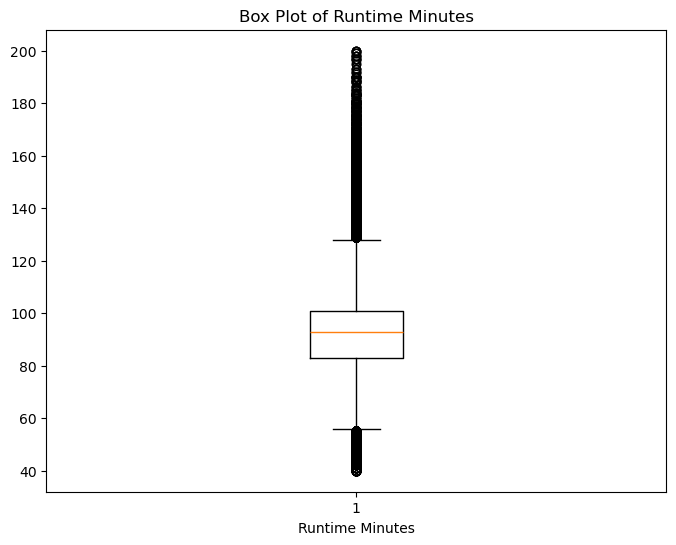

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(imdf['runtime_minutes'], vert=True)
plt.xlabel('Runtime Minutes')
plt.title('Box Plot of Runtime Minutes')
plt.show()

In [19]:
imdf['genres'].value_counts().head()

genres
Drama           11546
Documentary      9179
Comedy           5155
Comedy,Drama     2502
Horror           2465
Name: count, dtype: int64

Creating binary columns (genre indicators) based on the unique genres in the `genres` column.

1. **Extract Unique Genres:**
   - Split the column into individual genres using `.str.split(',')` and then explode the resulting list to get unique genre values.

2. **Create Binary Columns:**
   - For each unique genre, check if that genre is present in the original column using `.str.contains(genre)`.
   - The result is converted to 1 (if the movie belongs to that genre) or 0 (otherwise).

In [20]:
unique_genres = imdf['genres'].str.split(',').explode().unique()

for genre in unique_genres:
    imdf[f'is_{genre}'] = imdf['genres'].str.contains(genre).astype(int)

In [21]:
imdf['averagerating'] = imdf['averagerating'].astype('int')
imdf['is_original_title'] = imdf['is_original_title'].astype('int')
imdf['numvotes'] = imdf['numvotes'].astype('int')
imdf[['averagerating', 'is_original_title', 'ordering', 'numvotes']].describe()

,averagerating,is_original_title,ordering,numvotes
count,69171.000000,69171.000000,69171.0,6.917100e+04
mean,5.863946,0.145234,1.0,3.755296e+03
std,1.484655,0.352339,0.0,3.128829e+04
min,1.000000,0.000000,1.0,5.000000e+00
25%,5.000000,0.000000,1.0,1.500000e+01
50%,6.000000,0.000000,1.0,5.400000e+01
75%,7.000000,0.000000,1.0,3.130000e+02
max,10.000000,1.000000,1.0,1.841066e+06


Permanently drop the columns `primary_title`, `original_title`, and `title` from the DataFrame.

In [22]:
imdf.drop(['title', 'numvotes', 'original_title', 'primary_title', 'movie_id'], axis=1, inplace=True)

In [23]:
import pandas as pd

# Assuming your DataFrame is named 'imdf'
# First, select 1000 random entries
random_sample = imdf.sample(n=100, random_state=42)

# Next, save the random sample to a CSV file
random_sample.to_csv('im.csv', index=False)

print("Random sample saved to 'im.csv'")

Random sample saved to 'im.csv'


## `im.db` DATA ANALYSIS

In [24]:
imdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69171 entries, 0 to 261803
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   start_year         69171 non-null  int64  
 1   runtime_minutes    69171 non-null  float64
 2   genres             69171 non-null  object 
 3   averagerating      69171 non-null  int64  
 4   ordering           69171 non-null  int64  
 5   is_original_title  69171 non-null  int64  
 6   is_Action          69171 non-null  int64  
 7   is_Crime           69171 non-null  int64  
 8   is_Drama           69171 non-null  int64  
 9   is_Biography       69171 non-null  int64  
 10  is_Comedy          69171 non-null  int64  
 11  is_Fantasy         69171 non-null  int64  
 12  is_Horror          69171 non-null  int64  
 13  is_Thriller        69171 non-null  int64  
 14  is_Adventure       69171 non-null  int64  
 15  is_Animation       69171 non-null  int64  
 16  is_History         69171 n

### Univariate Analysis

#### 1. Distribution of Average Rating

- The distribution of average ratings shows how movies are rated by viewers. This can help identify the overall quality perception of movies in the dataset.
- Average ratings are a crucial metric for understanding audience satisfaction and movie success.
1. **Quality Benchmark**: Knowing the distribution of ratings helps establish a benchmark for the quality of movies the company should aim for. E.g an average 6 rating is the mode hence the threshold performance
2. **Genre Preferences**: Certain genres might consistently receive higher ratings, indicating stronger audience preferences.
3. **Improvement Areas**: Identifying genres or types of movies with lower average ratings can highlight areas for improvement or innovation.
4. **Quality Goals**: Aim for an average rating that aligns with successful movies to ensure high audience satisfaction.
5. **Genre Targeting**: Identify and focus on genres that consistently receive higher ratings and are more popular among audiences.


/home/ikn/miniforge3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


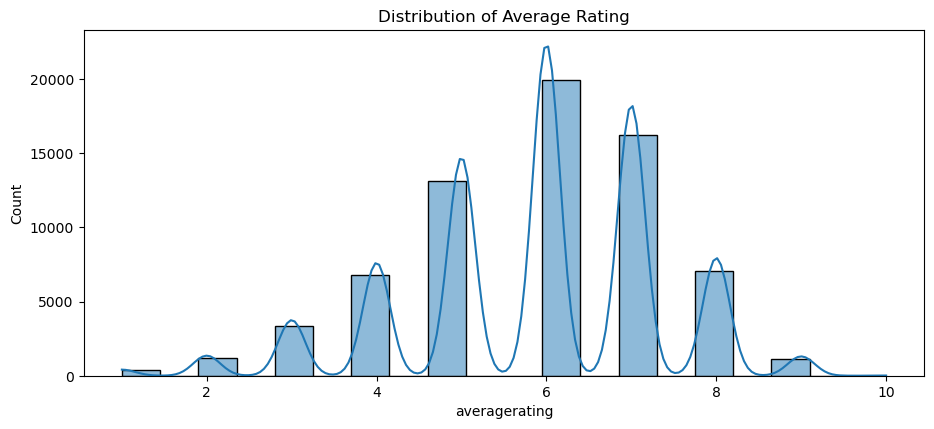

In [25]:
# Create variable data
data = imdf

# Set up the matplotlib figure
plt.figure(figsize=(18, 8))

# Distribution of averagerating
plt.subplot(2, 2, 3)
sns.histplot(data['averagerating'].dropna(), kde=True, bins=20)
plt.title('Distribution of Average Rating')

plt.tight_layout()
plt.show()

### 2. Bi-variate Analysis

1. **Identify Popular Genres**: By examining the average ratings across different genres, you can identify which genres tend to receive higher ratings from audiences. Hence guide the types of films the new studio should focus on producing.

2. **Understand Genre Performance**: The distribution of ratings for each genre reveals how well different types of movies are performing. Genres with consistently high ratings are well-received by audiences, indicating a safer investment.

3. **Market Differentiation**: It identify niches that may be underserved or oversaturated. If certain genres consistently have high ratings but fewer movies, it could be a strategic opportunity for the studio to differentiate itself by producing more content in those genres.

4. **Quality Benchmarking**: Knowing the average ratings for various genres allows your studio to set quality benchmarks. For instance, Game Shows typically receive higher ratings, the studio can aim to meet or exceed these ratings by focusing on high-quality production values and compelling storytelling in that genre.

5. **Targeted Marketing**: Movies in highly-rated genres can be marketed more aggressively, while movies in lower-rated genres might need additional promotion to attract audiences.                                      

### Average Rating by Genre

Analyzing the performance of each genre based on the average ratings:

1. **Documentary**: This genre has the highest median rating, indicating that it tends to receive favorable ratings from viewers.

2. **Drama** and **Biography**: They have relatively high median rating, suggesting consistent positive reception.

3. **Comedy**, **Fantasy**, **Adventure**, **Sci-Fi**, and **Action**: These genres have wider boxes, indicating mixed ratings.

4. **Crime**, **Romance**, **Mystery**, and **Family**: These genres have moderate median ratings.

5.  **Comedy**, **Fantasy**, **Adventure**, **Sci-Fi**, **Action**, **Music**, **Sport**, and **Western**: These genres show variability in ratings.

6. **Thriller**, **History**, **Reality-TV**, and **Game Show**: These genres have relatively low median ratings.

7. **Horror**: Horror has the lowest median rating, suggesting it's the least popular genre in terms of viewer ratings.

> The best-performing genre is Documentary, while Horror is the least favored.

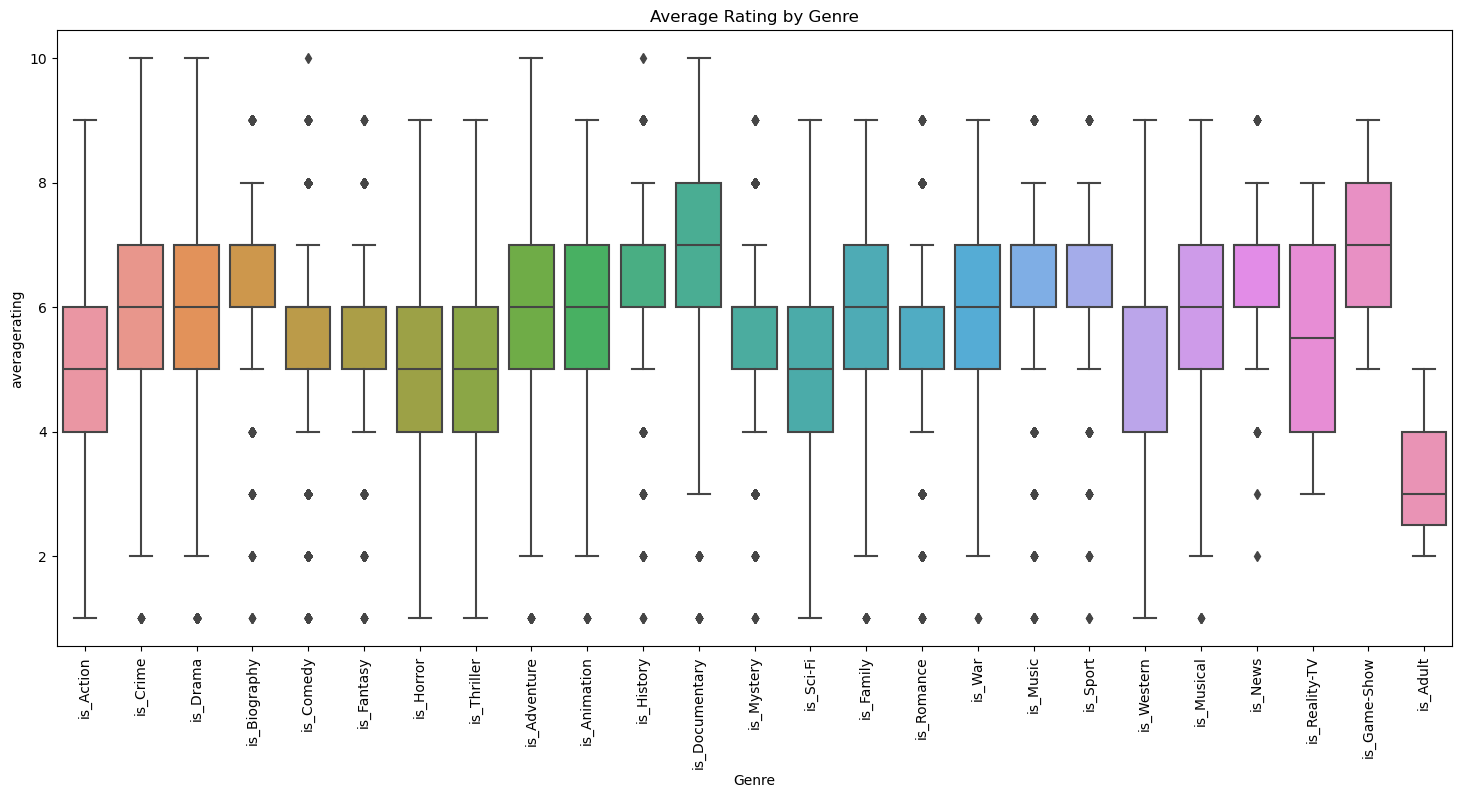

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input data
data = imdf

# List of genre columns
genre_columns = [
    'is_Action', 'is_Crime', 'is_Drama', 'is_Biography', 'is_Comedy',
    'is_Fantasy', 'is_Horror', 'is_Thriller', 'is_Adventure',
    'is_Animation', 'is_History', 'is_Documentary', 'is_Mystery',
    'is_Sci-Fi', 'is_Family', 'is_Romance', 'is_War', 'is_Music',
    'is_Sport', 'is_Western', 'is_Musical', 'is_News', 'is_Reality-TV',
    'is_Game-Show', 'is_Adult'
]

# Melt the DataFrame to long format for seaborn
data_melted = data.melt(id_vars=['averagerating'], value_vars=genre_columns, var_name='Genre', value_name='Is_Genre')

# # Filter out rows where Is_Genre is 0
data_melted = data_melted[data_melted['Is_Genre'] == 1]

# Plot the average ratings for each genre
plt.figure(figsize=(18, 8))
sns.boxplot(x='Genre', y='averagerating', data=data_melted)
plt.xticks(rotation=90)
plt.title('Average Rating by Genre')
plt.show()

### Multivariate analysis 

### Create a Correlation Matrix Heatmap of Movie Ratings and Genres.

1. **Strong Positive Correlations**:
   - **Adventure and Action**: These genres have a strong positive correlation, indicating that movies labeled as 'Adventure' are often also labeled as 'Action'.
   - **Comedy and Romance**: These genres also show a strong positive correlation, suggesting that romantic comedies are a common genre combination.

2. **Strong Negative Correlations**:
   - **Documentary and most other genres**: The 'Documentary' genre has low or negative correlations with most other genres, indicating that documentaries are less likely to be classified under multiple genres simultaneously.

3. **Neutral or Weak Correlations**:
   - **Animation and other genres**: The 'Animation' genre shows weak correlations with other genres, suggesting that animated movies are often distinct in their classification.

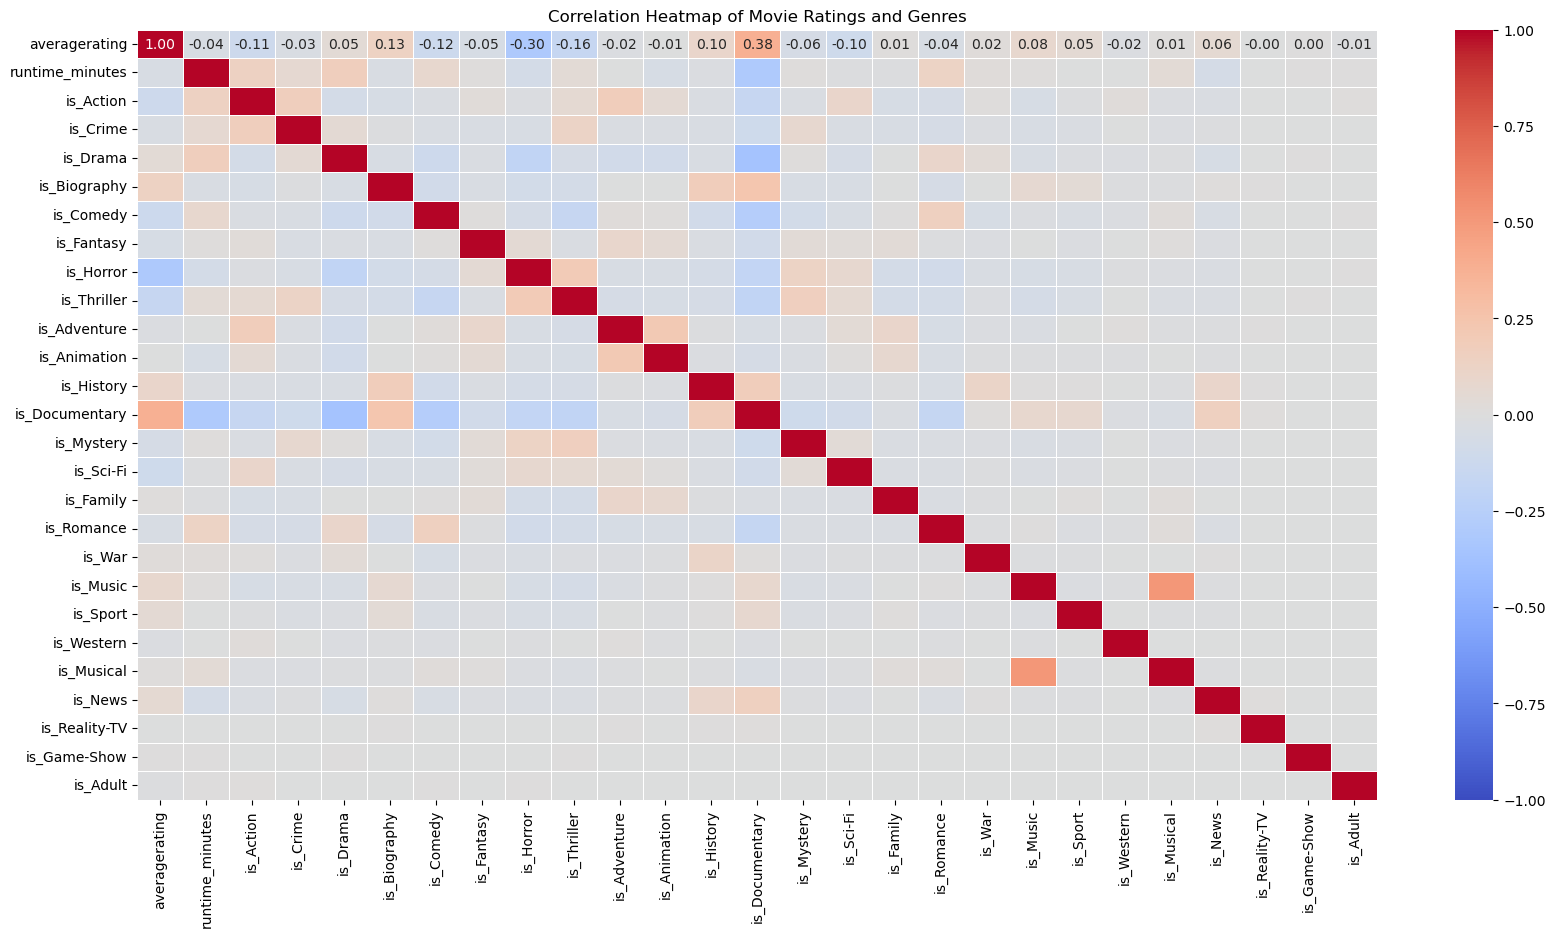

In [27]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the columns of interest
columns_of_interest = ['averagerating', 'runtime_minutes', 'is_Action', 'is_Crime', 'is_Drama', 'is_Biography', 'is_Comedy',
    'is_Fantasy', 'is_Horror', 'is_Thriller', 'is_Adventure',
    'is_Animation', 'is_History', 'is_Documentary', 'is_Mystery',
    'is_Sci-Fi', 'is_Family', 'is_Romance', 'is_War', 'is_Music',
    'is_Sport', 'is_Western', 'is_Musical', 'is_News', 'is_Reality-TV',
    'is_Game-Show', 'is_Adult']

# Creating a subset of the DataFrame with the specified columns
Heatmap_df = imdf[columns_of_interest]

# Computing the correlation matrix
correlation_matrix = Heatmap_df.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Movie Ratings and Genres')
plt.show()

### Statistical Distribution

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

1. **Selecting `runtime_minutes` column**:
   - The column contains information about movie runtimes.
   - This column contains discrete numeric values representing the duration of movies in minutes.

In [29]:
# Selecting a numeric column for analysis, i.e 'runtime_minutes'
data = imdf['runtime_minutes']

2. **Sampling Statistics**:
   - Creating a sample of 17,292 data points from the `runtime_minutes` column using random sampling (with a fixed random seed for reproducibility).
   - The sample mean (average) is approximately 94.18 minutes. (the central tendency)
   - The sample standard deviation is approximately 20.35 minutes. (variability)

In [30]:
sample_len = int(len(imdf) / 2)
sample = data.sample(sample_len, random_state=42)
mean_sample = sample.mean()
std_sample = sample.std()
print("Sample Mean:", mean_sample)
print("Sample Standard Deviation:", std_sample)

Sample Mean: 94.07618996674859
Sample Standard Deviation: 20.41248989065494


3. **Probability Mass Function (PMF) of movie runtimes.** 

- **Peak Around 100 Minutes**: The most common runtime appears to be around 100 minutes. This peak suggests that a significant number of movies fall within this duration.

- **Right-Skewed Distribution**: The PMF is right-skewed, meaning there are fewer movies with longer runtimes. Longer movies are less common.

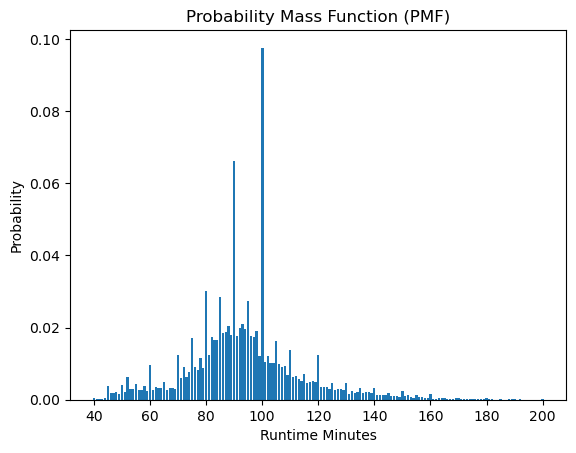

In [31]:
# Calculating Probability Mass Function (PMF)
pmf = sample.value_counts(normalize=True)

# Visualizing PMF
pmf = sample.value_counts(normalize=True)

# Create a bar plot
plt.bar(pmf.index, pmf.values)
plt.xlabel('Runtime Minutes')
plt.ylabel('Probability')
plt.title('Probability Mass Function (PMF)')
plt.show()

3. **Calculating Probability Density Function (PDF) of movie runtimes.**

- **Peak Around 100 Minutes**: The most common runtime appears to be around 100 minutes. The peak suggests that a significant number of movies fall within this duration.

- **Right-Skewed Distribution**: The PDF curve mirrors the histogram, indicating a right-skewed distribution. Longer movies are less common in this dataset.

/home/ikn/miniforge3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


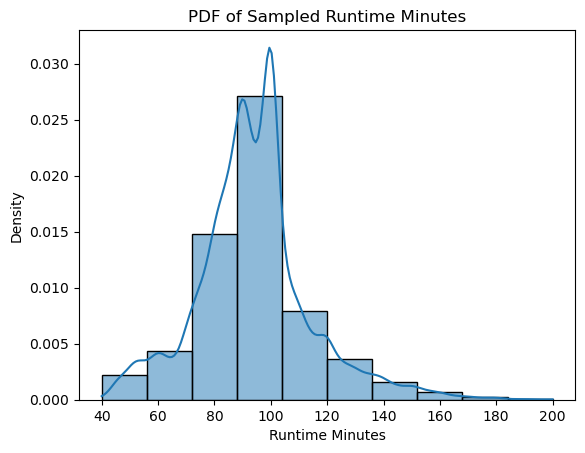

In [32]:
# 3. Probability Density Function (PDF)
sns.histplot(sample, kde=True, stat='density', bins=10)
plt.title('PDF of Sampled Runtime Minutes')
plt.xlabel('Runtime Minutes')
plt.ylabel('Density')
plt.show()

4. **Calculating the **Cumulative Distribution Function (CDF)** of sampled movie runtimes**

   - The curve starts at the bottom left corner (near 0) and progresses in a step-like fashion toward the top right corner (near 1).
   - Each step represents an increase in cumulative probability corresponding to the sampled runtime minutes.
   - The tallest step occurs around 100 to 120 minutes, indicating that a significant proportion of movies fall within this runtime range.
   - In summary, most movies have runtimes around 100 to 120 minutes. 

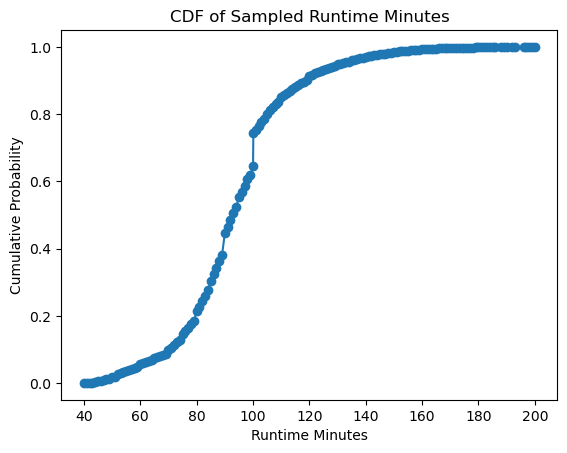

In [33]:
# 4. Cumulative Distribution Function (CDF)
cdf = sample.value_counts(normalize=True).sort_index().cumsum()
plt.plot(cdf.index, cdf.values, marker='o', linestyle='-')
plt.title('CDF of Sampled Runtime Minutes')
plt.xlabel('Runtime Minutes')
plt.ylabel('Cumulative Probability')
plt.show()

5. **Calculating a **Normal Distribution** (Gaussian distribution or bell curve).**

- **Peak Around 100 Minutes**: The peak of the curve represents the most common runtime, where most data points are concentrated. In this case, it appears to be around 100 minutes.

- **Tapering Ends**: The shape of the curve suggests that there are fewer movies with very short or very long runtimes compared to those around the average.

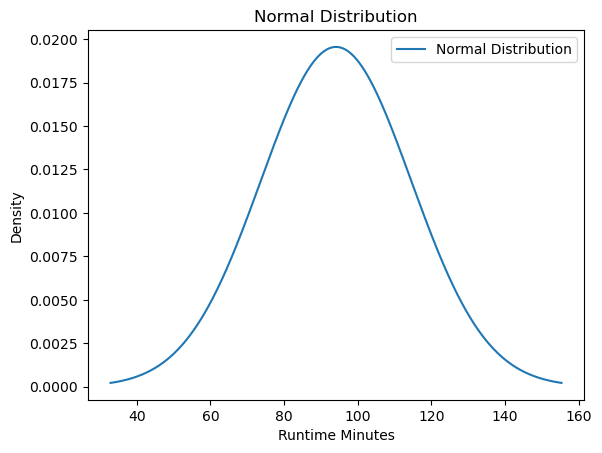

In [34]:
# 5. Normal Distribution
mean = data.mean()
std = data.std()
sample_len = len(sample)
x = np.linspace(mean - 3*std, mean + 3*std, sample_len)
plt.plot(x, stats.norm.pdf(x, mean, std), label='Normal Distribution')
plt.title('Normal Distribution')
plt.xlabel('Runtime Minutes')
plt.ylabel('Density')
plt.legend()
plt.show()

6. **Calculating a Standard Normal Distribution/Z-distribution.**

- **Peak Around Z-Score 0**: The peak of the curve corresponds to the mean Z-score (which is 0). This means that most movie runtimes in are close to the average.

- **Symmetric Shape**: The curve is symmetric around the mean, following the typical bell-shaped pattern of a normal distribution.

- **Tails**: As we move away from the mean (towards positive or negative Z-scores), the density decreases. This indicates that extreme values (far from the mean) are less common.

/home/ikn/miniforge3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


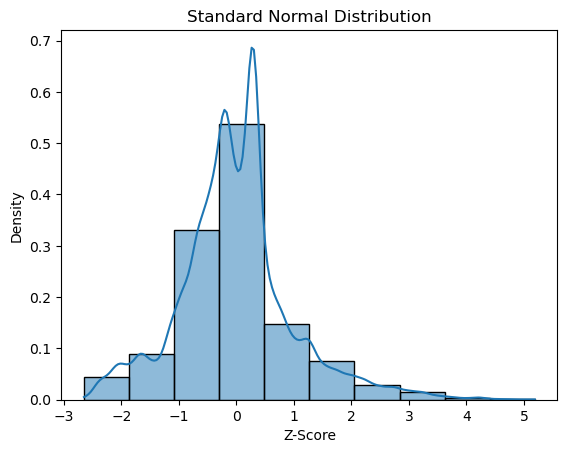

In [35]:
# 6. Standard Normal Distribution
z = (data - mean) / std
sns.histplot(z, kde=True, stat='density', bins=10)
plt.title('Standard Normal Distribution')
plt.xlabel('Z-Score')
plt.ylabel('Density')
plt.show()

7. **Calculating Central Limit Theorem (CLT)**

- **Sample Means Distribution**: The histogram represents the distribution of sample means. Each sample mean is calculated from a subset of movie runtimes.

- **Normal Distribution Shape**: The smooth curve (normal distribution) closely fits the tops of the histogram bars. This demonstrates that the distribution of sample means tends to be normal (bell-shaped) regardless of the original population distribution.

- **Mean Sample Runtime**: The peak of the curve corresponds to the mean sample runtime. From the graph, it appears to be around 94 minutes and 10 seconds.

- **Central Limit Theorem**: The CLT states that when we take repeated random samples from any population (regardless of its shape), the distribution of sample means will approach a normal distribution as the sample size increases.

/home/ikn/miniforge3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


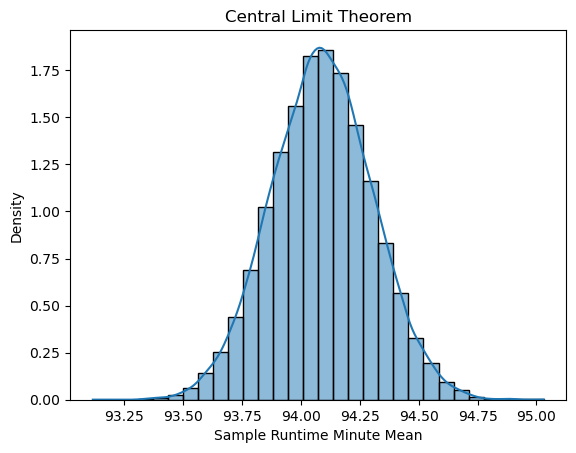

In [36]:
# 7. Central Limit Theorem
sample_len = len(sample)
means = [data.sample(8000, random_state=i).mean() for i in range(sample_len)]
sns.histplot(means, kde=True, stat='density', bins=30)
plt.title('Central Limit Theorem')
plt.xlabel('Sample Runtime Minute Mean')
plt.ylabel('Density')
plt.show()

8. **Calculating Confidence Level**

- **Standard Error**: it represents the variability of the sample mean from the true population mean, it is approximately.

- **T-Distribution Critical Value**: it corresponds to the desired confidence level and the degrees of freedom. For a 95% confidence interval, the critical value is approximately 0.2151.

- **95% Confidence Interval**: it provides a range within which we are confident the true population parameter lies that is (93.86, 94.29) minutes.

In [37]:
# 8. Confidence Level
conf_level = 0.95
n = len(sample)
se = std_sample / np.sqrt(n)
h = se * stats.t.ppf((1 + conf_level) / 2, n - 1)
conf_interval = (mean_sample - h, mean_sample + h)
print("Standard Error:", se)
print("t-distribution critical value:", h)
print("95% Confidence Interval:", conf_interval)

Standard Error: 0.10976202042919954
t-distribution critical value: 0.21513713623847955
95% Confidence Interval: (93.8610528305101, 94.29132710298707)


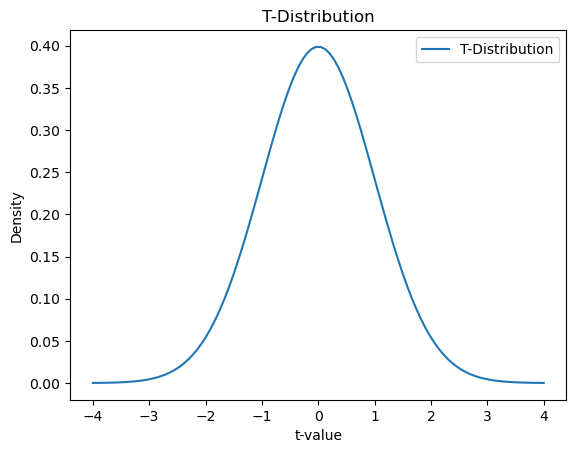

In [38]:
# 9. T-Distribution
x_t = np.linspace(-4, 4, 100)
plt.plot(x_t, stats.t.pdf(x_t, df=n-1), label='T-Distribution')
plt.title('T-Distribution')
plt.xlabel('t-value')
plt.ylabel('Density')
plt.legend()
plt.show()

## Hypothesis Testing

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [40]:
# Selecting numeric columns for analysis, e.g., 'runtime_minutes' and 'averagerating'
data1 = imdf['runtime_minutes']
data2 = imdf['averagerating']

### 1. **Conducting ANOVA TEST**

- **Between-Group Variability (Sum of Squares)**: `sum_sq` represents the variability for each genre.
     - `C(is_Documentary)` has a variability of approximately 24642.35.
     - `C(is_Drama)` has a variability of approximately 5857.59.
     - `C(is_Biography)` has a variability of approximately 209.86.

- **Degrees of Freedom (df)**: it represents the number of independent pieces of information available for estimating the population parameters.
     - Each factor (genre) has 1 degree of freedom.
     - The residual (error) has 69167 degrees of freedom.

- **F-Statistic**: it tests whether there are significant differences among the group means.
     - `C(is_Documentary)` has an F-value of approximately 13673.56.
     - `C(is_Drama)` has an F-value of approximately 3250.26.
     - `C(is_Biography)` has an F-value of approximately 116.45.
   - Larger F-values indicate stronger evidence against the null hypothesis (equal means).

- **p-Value (PR(>F))**: it assesses the significance of the F-statistic.
     - The p-value for `C(is_Documentary)` is effectively 0 (very significant).
     - The p-value for `C(is_Drama)` is also effectively 0.
     - The p-value for `C(is_Biography)` is extremely small (3.99e-27).
   - All p-values suggest rejecting the null hypothesis.

- **Residual Variability**: The residual sum of squares (124652.10) represents unexplained variability. It accounts for the differences not explained by the genres.

In summary, the ANOVA results indicate significant differences in average ratings among documentary, drama, and biography genres.

> Null Hypothesis: All the the genre runtime minutes and mean are equal
    
> Alternative Hypothesis: All the the genre runtime minutes and mean are not equal

In [41]:
# ANOVA: Analysis of Variance
anova_model = ols('averagerating ~ C(is_Documentary) + C(is_Drama) + C(is_Biography)', data=imdf).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print("ANOVA Table:\n", anova_table)
print("\n Reject Null Hypothesis")

ANOVA Table:
                           sum_sq       df             F        PR(>F)
C(is_Documentary)   24642.353495      1.0  13673.557664  0.000000e+00
C(is_Drama)          5857.594339      1.0   3250.263981  0.000000e+00
C(is_Biography)       209.856825      1.0    116.445428  3.990685e-27
Residual           124652.099039  69167.0           NaN           NaN

 Reject Null Hypothesis


In [42]:
# Calculate the sum of each column
genre_sums = imdf[[
    'is_Action', 'is_Crime', 'is_Drama', 'is_Biography', 'is_Comedy',
    'is_Fantasy', 'is_Horror', 'is_Thriller', 'is_Adventure',
    'is_Animation', 'is_History', 'is_Documentary', 'is_Mystery',
    'is_Sci-Fi', 'is_Family', 'is_Romance', 'is_War', 'is_Music',
    'is_Sport', 'is_Western', 'is_Musical', 'is_News', 'is_Reality-TV',
    'is_Game-Show', 'is_Adult'
]].sum()

# Sort the sums in descending order
sorted_genre_sums = genre_sums.sort_values(ascending=False)

# Display the sorted sums
print(sorted_genre_sums)


is_Drama          30070
is_Comedy         16346
is_Documentary    16257
is_Thriller        7909
is_Horror          7279
is_Action          6677
is_Romance         6254
is_Crime           4473
is_Adventure       3686
is_Biography       3664
is_Family          3239
is_Mystery         2940
is_History         2707
is_Music           2493
is_Sci-Fi          2124
is_Fantasy         2053
is_Animation       1635
is_Sport           1099
is_War              822
is_Musical          666
is_News             565
is_Western          264
is_Reality-TV        14
is_Adult              3
is_Game-Show          2
dtype: int64


### A/B testing of Drama vs Biography Movies

- The graph displays three overlaid histograms, each representing the distribution of runtime minutes for a specific movie genre.
   - The genres are:
     - **Drama** (shown in red)
     - **Biography** (shown in blue)
     - **Documentary** (represented by an orange kernel density estimate line)
   - The x-axis represents "Runtime Minutes," ranging from 40 to 200 minutes.
   - The y-axis represents "Density," indicating the proportion of movies falling within each runtime range.

2. **Genre Characteristics**:
   - **Drama**:
     - The drama genre has a wide distribution, with a peak around 100 minutes.
     - It extends well beyond 150 minutes, suggesting some longer dramas.
   - **Biography**:
     - The biography genre also shows a wide distribution.
     - Its peak occurs around 120-140 minutes.
   - **Documentary**:
     - The documentary genre has a smoother distribution represented by the orange KDE line.
     - It peaks around 80-100 minutes, indicating shorter documentaries.

3. **Insights**:
   - The graph visually highlights differences in typical movie lengths across genres.
   - Documentaries tend to be shorter, dramas vary widely, and biographies fall in between.
   - These insights can inform content creators, filmmakers, and viewers about genre-specific expectations.



/home/ikn/miniforge3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ikn/miniforge3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


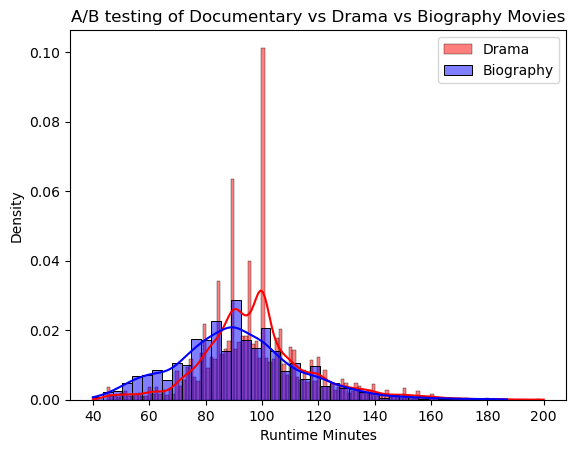

In [43]:
# A/B Testing
genre1 = imdf[imdf['is_Drama'] == 1]['runtime_minutes']
genre2 = imdf[imdf['is_Biography'] == 1]['runtime_minutes']

# Visualizing the distributions
sns.histplot(genre1, kde=True, color='red', label='Drama', stat='density')
sns.histplot(genre2, kde=True, color='blue', label='Biography', stat='density')
plt.legend()
plt.title('A/B testing of Documentary vs Drama vs Biography Movies')
plt.xlabel('Runtime Minutes')
plt.ylabel('Density')
plt.show()

### Two Sample T-Test (Welch’s t-test)

- **T-Statistic**: it is a measure of how far the sample means differ from each other relative to the variability within the samples. The t-statistic is approximately 17.52. A larger t-statistic indicates stronger evidence against the null hypothesis (that the means are equal).

- **P-Value**: it represents the probability of observing such extreme results (or more extreme) if the null hypothesis were true. The p-value is approximately 1.79e-66 (which is very close to zero). This extremely small p-value suggests strong evidence against the null hypothesis.

- Since the p-value is very small, you have evidence to conclude that there is a significant difference in the mean runtime between the Drama and Biography genres. The two genres have different average runtimes.

In [44]:
# 2. T-Test (Two Sample T-Test)
genre1 = imdf[imdf['is_Drama'] == 1]['runtime_minutes']
genre2 = imdf[imdf['is_Biography'] == 1]['runtime_minutes']

# Performing a Welch’s t-test since they have different variance
t_stat, p_value = stats.ttest_ind(genre1, genre2, equal_var=False)
print(f"T-Test: t-statistic = {t_stat}, p-value = {p_value}")

# Significance Level
a = 0.05
if p_value < a:
    print("Reject Null Hypothesis: There is not a significant difference in the mean runtime between the Drama and Biography genres")
else:
    print("Accept Null Hypothesis: There is a significant difference in the mean runtime between the Drama and Biography genres")

T-Test: t-statistic = 17.51698922477311, p-value = 1.78878591687351e-66
Reject Null Hypothesis: There is not a significant difference in the mean runtime between the Drama and Biography genres


### Linear Regression and Regression Diagnostics

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.power import TTestIndPower, zt_ind_solve_power

In [46]:
# Selecting numeric columns for regression, e.g., 'runtime_minutes' and 'averagerating'
X = imdf['runtime_minutes']
y = imdf['averagerating']

### 1. Calculating Cohen's d for `is_Drama` and `is_Biography`

It is a measure of effect size that quantifies the difference between two groups in terms of their means. It's used to assess the magnitude of an effect. Specifically, it tells us how far apart the means of two groups are relative to their pooled standard deviation.

- **Effect Size (Cohen's d): -0.6382**
  - The value represents the effect size between two groups: Drama movies and Biography movies.
  - A negative Cohen's d indicates that Drama movies tend to have lower average ratings compared to Biography movies.
  - The magnitude of the effect is approximately 0.64 standard deviations, which suggests a moderate effect size.

In [47]:
# 1. Effect Size (Cohen's d for two groups)
# Input data
group1 = imdf[imdf['is_Drama'] == 1]['averagerating']
group2 = imdf[imdf['is_Biography'] == 1]['averagerating']

# Calculating effect size
effect_size = (group1.mean() - group2.mean()) / np.sqrt((group1.std()**2 + group2.std()**2) / 2)

print("Effect Size (Cohen's d):", effect_size)

Effect Size (Cohen's d): -0.6382377117879376


### 2. Calculating the Statistical Power

- **Statistical Power**: 1.0
  - The value of indicates perfect statistical power.
  - In hypothesis testing, statistical power represents the probability of correctly rejecting a null hypothesis when it is false (i.e., detecting an effect if it truly exists).
  - A power of 1.0 means that our test has a 100% chance of detecting the effect size (Cohen's d = -0.6382).
  - High statistical power is desirable because it minimizes the risk of Type II errors (false negatives).

In [48]:
power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs1=len(group1), alpha=0.05)
print("Statistical Power:", power)

Statistical Power: 1.0


### 3. Calculating the Chi-Square Test

- The chi-squared test assesses the independence between two categorical variables.
- It examines whether there is a significant association between the genres "Drama" and "Biography" in your dataset.
    - The chi-squared statistic is 112.93.
    - The p-value is 2.24e-26, indicating strong evidence against the null hypothesis of independence.
    - The null hypothesis assumes that the two variables are independent (i.e., no association).
    - Since the p-value is extremely low, we reject the null hypothesis and conclude that there is a significant association between the genres.

In [49]:
# 3. Chi-Square Test: Testing independence between two categorical variables
chi2, p, dof, expected = stats.chi2_contingency(pd.crosstab(imdf['is_Drama'], imdf['is_Biography']))
print(f"Chi-Square Test: chi2 = {chi2}, p-value = {p}")

Chi-Square Test: chi2 = 112.92968561841823, p-value = 2.235642079186849e-26


### 4. Performing linear regression model based on `averagerating` and `runtime_minutes`

**Model Information**:
   - **Dependent Variable (y)**: The target variable is the average rating ('averagerating') of movies.
   - **Independent Feature (X)**: The feature used for prediction is the runtime of movies ('runtime_minutes').

In [50]:
# Defining the feature and target
X = imdf['runtime_minutes'] # feature
y = imdf['averagerating'] # target

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

**Regression Coefficients**:
   - The model estimates the relationship between 'averagerating' and 'runtime_minutes'.
   - The coefficient for 'runtime_minutes' is approximately -0.0029.

**Intercept (Constant)**:
   - The intercept (constant) term is approximately 70.48.

**R-squared (R²)**:
   - The R-squared value is 0.002.
   - This indicates that only about 0.2% of the variation in 'averagerating' can be explained by 'runtime_minutes'.

**F-statistic**:
   - The F-statistic is 13.15.
   - It assesses the overall significance of the model.

**p-values**:
   - The p-value for 'runtime_minutes' is 0.001, indicating its significance.
   - The p-value for the intercept is very small (close to 0), suggesting its importance.

**Model Fit**:
   - The model's goodness of fit is modest (R-squared = 0.002).
   - The F-statistic's p-value (0.00296) suggests that the model is statistically significant.

In [51]:
# 6. Statistical Modeling: Linear Regression Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          averagerating   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     107.6
Date:                Mon, 29 Jul 2024   Prob (F-statistic):           3.42e-25
Time:                        00:53:55   Log-Likelihood:            -1.2543e+05
No. Observations:               69171   AIC:                         2.509e+05
Df Residuals:                   69169   BIC:                         2.509e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.1338      0.027    2

### 7. Regression Model Evaluation: Residual Plot, QQ Plot, Homoscedasticity, Multicollinearity

#### 1. Residual Plot

**Residual Plot**:
   - A residual plot shows the differences (residuals) between the actual observed values and the predicted values from a regression model.
   - In the plot, each dot represents a data point, and its vertical position indicates the residual (actual value minus predicted value).
   - The horizontal dashed red line at y=0 represents where residuals would be if predictions were perfect (i.e., no error).
   - Ideally, residuals should be randomly scattered around this line with no discernible pattern.

**Interpretation**:
   - If the residuals are randomly distributed around the y=0 line, it suggests that the model's predictions are unbiased and accurate.
   - Patterns (e.g., a funnel shape, U-shape, or curvature) in the residuals may indicate issues with the model (e.g., heteroscedasticity or nonlinearity).
   - The plot appears to follow the expected pattern, with residuals centered around zero.

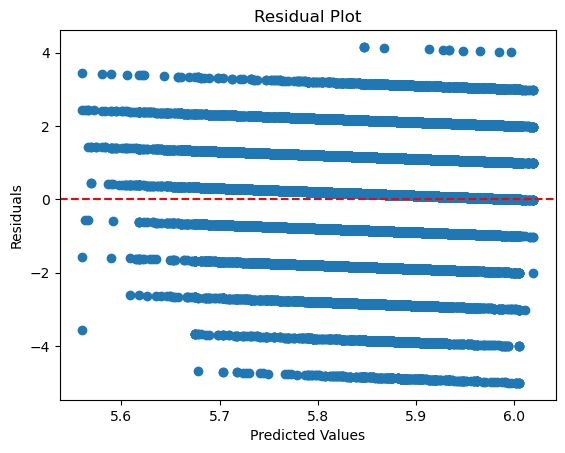

In [52]:
# Residual Plot
plt.scatter(predictions, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

#### 2. QQ Plot

- A QQ plot is used to assess whether a dataset follows a specific theoretical distribution (usually the normal distribution).
- It compares the quantiles of the sample data against the quantiles of the theoretical distribution.

**Interpretation**:
   - The scatterplot in the chart shows points representing quantiles from the sample data plotted against corresponding quantiles of the theoretical distribution (usually the normal distribution).
   - The red reference line at a represents what would be expected if the sample data perfectly followed the theoretical distribution.
   - Points close to this line indicate good agreement between sample and theoretical quantiles.
   - The QQ plot appears to follow the expected pattern.
   - Most points are close to the reference line, suggesting that the residuals (differences between observed and predicted values) align reasonably well with a normal distribution.
   - However, there are some deviations at both ends (tails) of the plot, indicating potential outliers or heavy tails compared to a normal distribution.

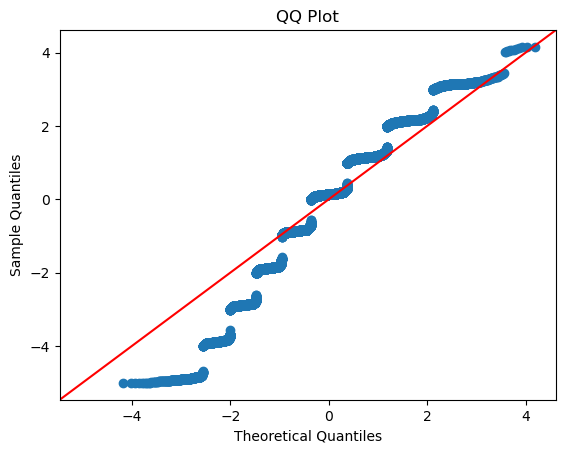

In [53]:
# QQ Plot
sm.qqplot(model.resid, line='45')
plt.title('QQ Plot')
plt.show()

#### 3. Homoscedasticity

- Homoscedasticity refers to the assumption that the variance of the residuals (differences between observed and predicted values) remains constant across all levels of the independent variable (in this case, the predicted values). It means that the spread or dispersion of residuals should be consistent as we move along the range of predicted values.

**Interpretation**:
   - In a homoscedastic scenario, there would be a random scatter of points without any distinct pattern.
   - However, in the plot, there are clear patterns:
     - Bands or lines of points appear at different levels on the y-axis for similar ranges of predicted values.
     - This suggests that the variance of residuals changes with predicted values, which violates the homoscedasticity assumption.
     - Such patterns may indicate **heteroscedasticity** (unequal variance).

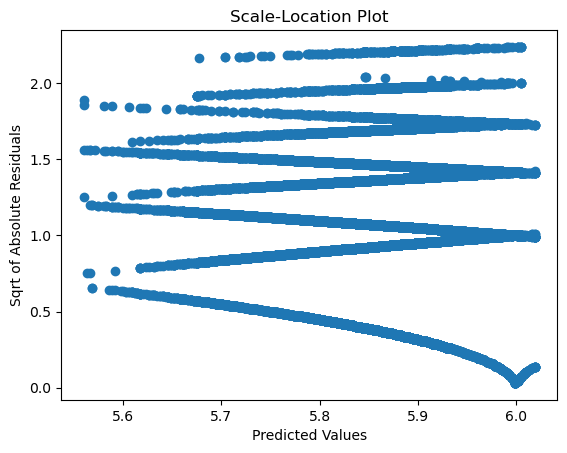

In [54]:
# Homoscedasticity
# Create a Scale-Location Plot
# y-axis represents the square root of the absolute residuals (i.e., the positive values of the residuals).
# x-axis represents the predicted values from the regression model.
plt.scatter(predictions, np.sqrt(np.abs(model.resid)))
plt.xlabel('Predicted Values')
plt.ylabel('Sqrt of Absolute Residuals')
plt.title('Scale-Location Plot')
plt.show()

#### 4. Coefficient of Determination (R²)

In [55]:
r_squared = model.rsquared
print("Coefficient of Determination (R²):", r_squared)

Coefficient of Determination (R²): 0.0015532975418881545


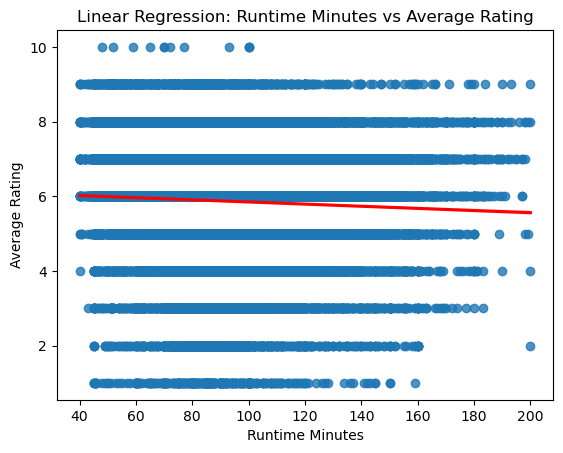

In [56]:
# Visualization: Regression Line
sns.regplot(x='runtime_minutes', y='averagerating', data=imdf, line_kws={"color":"red"})
plt.xlabel('Runtime Minutes')
plt.ylabel('Average Rating')
plt.title('Linear Regression: Runtime Minutes vs Average Rating')
plt.show()
